## Importing Libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


### Data Description
***title - Name of the product

Rating- average rating given to a product

maincateg - category that the product is listed under(men/women)

platform - platform on which it is sold on (Eg. Amazon, Flipkart)

price1 - Discounted Price of the listed product

actprice1 - Actual price of the listed product

Offer % - Discount percent

norating1 - number of ratings available for a particular product

noreviews1 - number of reviews available for a particular product

star_5f - number of five star ratings given to a particular product

star_4f - number of four star ratings given to a particular product

star_3f - number of three star ratings given to a particular product

star_2f - number of two star ratings given to a particular product

star_1f - number of one star ratings given to a particular product

fulfilled1- whether it is Amazon fulfilled or not***

In [87]:
train_df=pd.read_csv("train.csv")

In [88]:
train_df.shape

(15730, 16)

In [89]:
train_df.columns


Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
       'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

In [90]:
features=['Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f',
       'star_4f', 'star_3f', 'star_2f', 'star_1f', 'fulfilled1',
       'maincateg_Men', 'maincateg_Women', 'platform_Amazon',
       'platform_Flipkart']

In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15730 non-null  int64  
 1   title       15730 non-null  object 
 2   Rating      15730 non-null  float64
 3   maincateg   15204 non-null  object 
 4   platform    15730 non-null  object 
 5   price1      15730 non-null  int64  
 6   actprice1   15730 non-null  int64  
 7   Offer %     15730 non-null  object 
 8   norating1   15052 non-null  float64
 9   noreviews1  15152 non-null  float64
 10  star_5f     15142 non-null  float64
 11  star_4f     15191 non-null  float64
 12  star_3f     15499 non-null  float64
 13  star_2f     15730 non-null  int64  
 14  star_1f     15730 non-null  int64  
 15  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 1.9+ MB


In [92]:
train_df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [93]:
train_df.nunique()

id            15730
title          4782
Rating           34
maincateg         2
platform          2
price1         1478
actprice1       885
Offer %        2530
norating1      2770
noreviews1     1122
star_5f        2196
star_4f        1448
star_3f        1107
star_2f         759
star_1f        1001
fulfilled1        2
dtype: int64

In [94]:
train_df.dtypes

id              int64
title          object
Rating        float64
maincateg      object
platform       object
price1          int64
actprice1       int64
Offer %        object
norating1     float64
noreviews1    float64
star_5f       float64
star_4f       float64
star_3f       float64
star_2f         int64
star_1f         int64
fulfilled1      int64
dtype: object

In [95]:
train_df.describe()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,10479.541577,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,6080.166276,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,3.000000,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10458.500000,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,15766.750000,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,20973.000000,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


In [96]:
train_df.isna().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

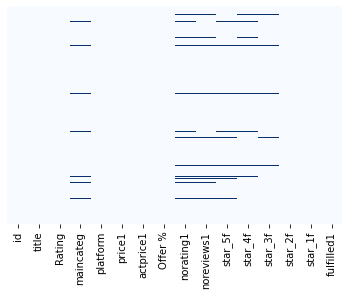

In [97]:
import seaborn as sns
sns.heatmap(train_df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=train_df.columns);

In [98]:
print('number of duplicates = ',train_df.duplicated().sum())

number of duplicates =  0


In [99]:
train_df=train_df.dropna(axis=0)
train_df.shape

(14945, 16)

In [100]:
train_df=pd.get_dummies(train_df,columns=['maincateg','platform'])

In [101]:
train_df.drop(['id','title'],axis=1,inplace=True)

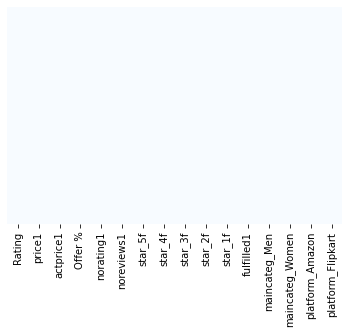

In [102]:
import seaborn as sns
sns.heatmap(train_df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=train_df.columns);

In [103]:
train_df.isnull().sum()

Rating               0
price1               0
actprice1            0
Offer %              0
norating1            0
noreviews1           0
star_5f              0
star_4f              0
star_3f              0
star_2f              0
star_1f              0
fulfilled1           0
maincateg_Men        0
maincateg_Women      0
platform_Amazon      0
platform_Flipkart    0
dtype: int64

In [104]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14945 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             14945 non-null  float64
 1   price1             14945 non-null  int64  
 2   actprice1          14945 non-null  int64  
 3   Offer %            14945 non-null  object 
 4   norating1          14945 non-null  float64
 5   noreviews1         14945 non-null  float64
 6   star_5f            14945 non-null  float64
 7   star_4f            14945 non-null  float64
 8   star_3f            14945 non-null  float64
 9   star_2f            14945 non-null  int64  
 10  star_1f            14945 non-null  int64  
 11  fulfilled1         14945 non-null  int64  
 12  maincateg_Men      14945 non-null  uint8  
 13  maincateg_Women    14945 non-null  uint8  
 14  platform_Amazon    14945 non-null  uint8  
 15  platform_Flipkart  14945 non-null  uint8  
dtypes: float64(6), int64(5

In [105]:
# train_df['Offer_percent'] = train_df['Offer %'].str.rstrip('%').astype('float')
train_df.drop(['Offer %'],axis=1,inplace=True)

In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14945 entries, 0 to 15729
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             14945 non-null  float64
 1   price1             14945 non-null  int64  
 2   actprice1          14945 non-null  int64  
 3   norating1          14945 non-null  float64
 4   noreviews1         14945 non-null  float64
 5   star_5f            14945 non-null  float64
 6   star_4f            14945 non-null  float64
 7   star_3f            14945 non-null  float64
 8   star_2f            14945 non-null  int64  
 9   star_1f            14945 non-null  int64  
 10  fulfilled1         14945 non-null  int64  
 11  maincateg_Men      14945 non-null  uint8  
 12  maincateg_Women    14945 non-null  uint8  
 13  platform_Amazon    14945 non-null  uint8  
 14  platform_Flipkart  14945 non-null  uint8  
dtypes: float64(6), int64(5), uint8(4)
memory usage: 1.4 MB


##  Multiple Linear Regression

In [107]:
X=train_df.drop(['price1'],axis=1)
y=train_df.price1

C:\Users\sg001\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price1', ylabel='Density'>

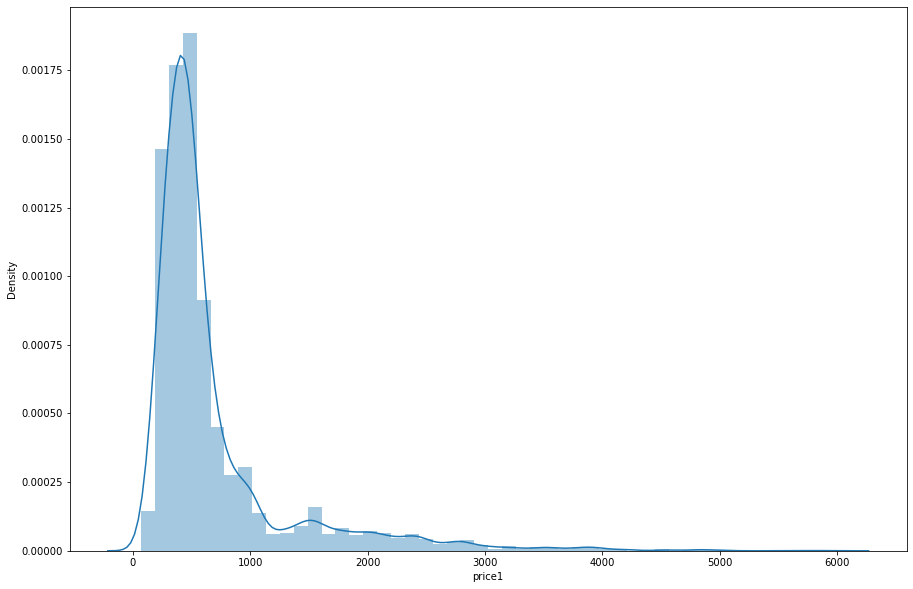

In [108]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(y)

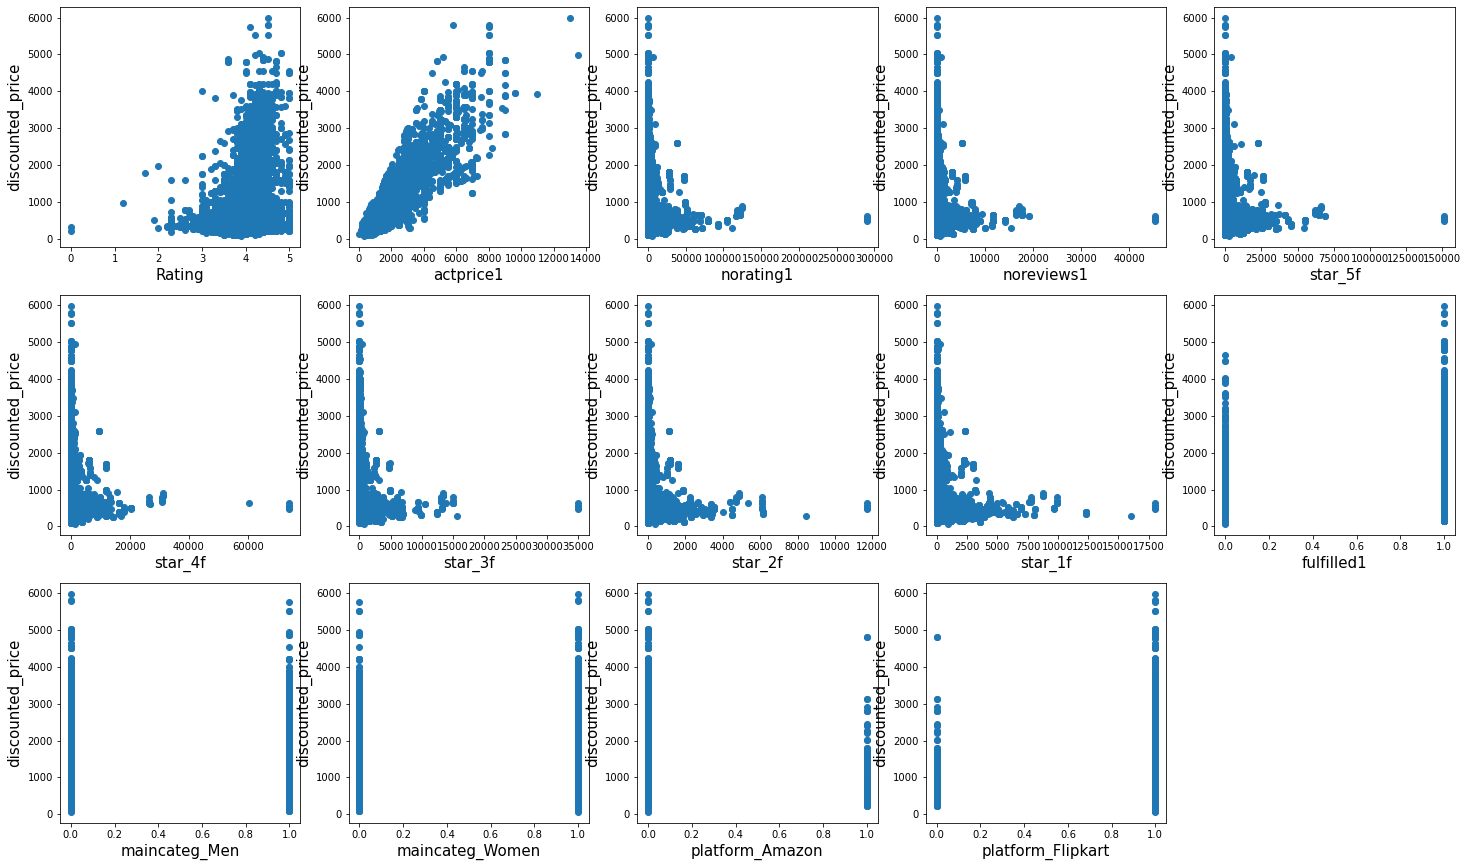

In [109]:
plt.figure(figsize=(25,15))
for i,feature in enumerate(train_df[features]):
    plt.subplot(3,5,i+1)
    plt.scatter(train_df[feature],train_df['price1'])
    plt.ylabel('discounted_price',size=15)
    plt.xlabel(feature,size=15)

In [110]:
# first we will ols regression using full data
import statsmodels.api as sm
ols=sm.OLS(y,X)
ols_fit=ols.fit()
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 price1   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     5113.
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:32:41   Log-Likelihood:            -1.0577e+05
No. Observations:               14945   AIC:                         2.116e+05
Df Residuals:                   14932   BIC:                         2.117e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Rating              146.6116      8.430     17.393      0.000     130.089     163.134
actprice1             0.4498      0.002    222.463      0.000       0.446       0.454
norating1            -0.0056      0.003     -1.706      0.088      -0.012       0.001
noreviews1            0.0491      0.019      2.583      0.010       0.012       0.086
star_5f               0.0063      0.003      2.142      0.032       0.001       0.012
star_4f               0.0342      0.006      5.757      0.000       0.023       0.046
star_3f              -0.1081      0.019     -5.637      0.000      -0.146      -0.070
star_2f              -0.1216      0.041     -2.947      0.003      -0.203      -0.041
star_1f               0.0730      0.018      3.959      0.000       0.037       0.109
fulfilled1           65.6913      5.027     13.068      0.000      55.838      75.545
maincateg_Men      -211.8029     16.554    -12.794      0.000    -244.252    -179.354
maincateg_Women    -221.2583     17.255    -12.823      0.000    -255.081    -187.436
platform_Amazon     -90.0710     19.786     -4.552      0.000    -128.855     -51.287
platform_Flipkart  -342.9902     17.362    -19.755      0.000    -377.022    -308.959
==============================================================================
Omnibus:                     3666.666   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52517.329
Skew:                           0.784   Prob(JB):                         0.00
Kurtosis:                      12.049   Cond. No.                     9.73e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.22e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [111]:
#  split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=25)

In [112]:
print(X_train.shape, X_test.shape)

(11956, 14) (2989, 14)


In [28]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [29]:
# import statsmodels.api as sm
# X_constant = sm.add_constant(X_train)
# model=sm.OLS(y_train,X_constant).fit()
# model.summary()

In [30]:
from sklearn import linear_model as lm
lr=lm.LinearRegression()
lr.fit(X_scaled_train,y_train)

LinearRegression()

In [31]:
print("coeficients are : ",lr.coef_," \n\n  and intercept is ",lr.intercept_)

coeficients are :  [  43.663976    560.58021627  -54.98397757   71.52305807   15.86229686
  142.44257297 -190.97213425  -46.0676008    68.42763275   32.22802093
    2.14535607   -2.14535607   17.16446877  -17.16446877]  

  and intercept is  688.4397791903646


In [32]:
 y_predicted = lr.predict(X_scaled_test)

In [33]:
def RMSE(X_test,y_test):
    import math
    y_actual = y_test
    y_predicted = lr.predict(X_test)
 
    #MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
    MSE= metrics.mean_squared_error(y_test,y_predicted)
    RMSE = math.sqrt(MSE)
    print("Root Mean absolute Error: ",metrics.mean_absolute_error(y_test,y_predicted))
    print("Mean Square Error: ",MSE)
    print("Root Mean Square Error: ",RMSE)
 

In [34]:
RMSE(X_scaled_test,y_test)

Root Mean absolute Error:  183.67572247796704
Mean Square Error:  81742.16211144198
Root Mean Square Error:  285.9058623243707


In [35]:
def evaluation(lr,X_test,y_test):
    r2=lr.score(X_test,y_test)
    adjusted_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("R2 value is : ",r2 ,"  and adjusted R2 value is ",adjusted_r2)

In [36]:
evaluation(lr,X_scaled_train,y_train)

R2 value is :  0.8053684661619186   and adjusted R2 value is  0.8051402740947774


In [37]:
evaluation(lr,X_scaled_test,y_test)

R2 value is :  0.7986598341144387   and adjusted R2 value is  0.7977120323920455


## Now predict using test dataset

In [117]:
test_df=pd.read_csv('test.csv')


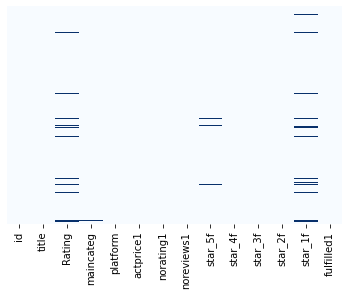

In [118]:
import seaborn as sns
sns.heatmap(test_df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=test_df.columns);

In [119]:
test_df.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [120]:
test_df.shape

(5244, 14)

In [121]:
test_df['maincateg'].value_counts()

Women    3032
Men      2145
Name: maincateg, dtype: int64

In [122]:
max_val=test_df['maincateg'].mode()[0]
max_val

'Women'

In [123]:
test_df['maincateg']=test_df['maincateg'].fillna(max_val)

C:\Users\sg001\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sg001\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='star_5f', ylabel='Density'>

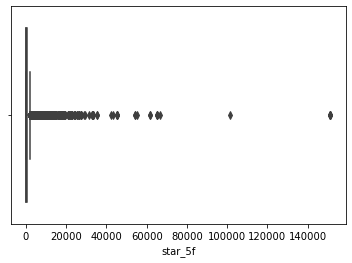

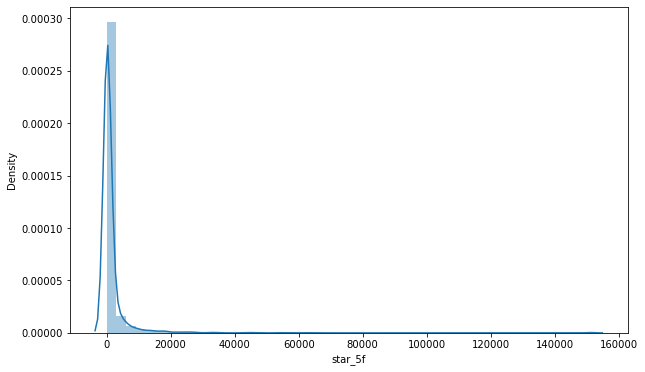

In [124]:
import seaborn as sns
sns.boxplot(test_df.star_5f)

fig,ax=plt.subplots(figsize=(10,6))
sns.distplot(test_df.star_5f)

In [125]:
test_df['star_5f'].value_counts()

4.0       80
3.0       75
2.0       69
6.0       61
5.0       59
          ..
4898.0     1
823.0      1
3526.0     1
319.0      1
2055.0     1
Name: star_5f, Length: 1437, dtype: int64

In [126]:
r5=test_df['star_5f'].mode()[0]
r5

4.0

In [127]:
test_df['star_5f']=test_df['star_5f'].fillna(r5)

C:\Users\sg001\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sg001\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='star_1f', ylabel='Density'>

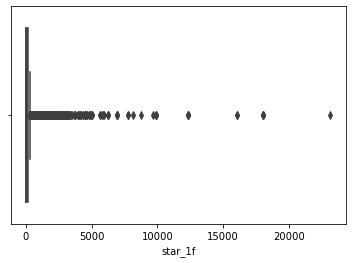

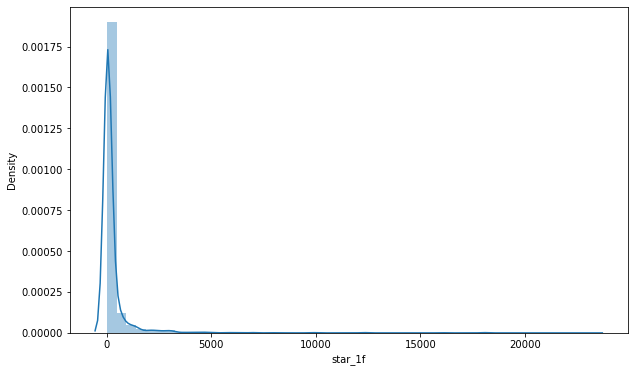

In [128]:
import seaborn as sns
sns.boxplot(test_df.star_1f)

fig,ax=plt.subplots(figsize=(10,6))
sns.distplot(test_df.star_1f)

In [129]:
test_df['star_1f'].value_counts()

0.0       290
1.0       273
2.0       202
3.0       162
5.0       145
         ... 
1803.0      1
565.0       1
950.0       1
1155.0      1
1270.0      1
Name: star_1f, Length: 719, dtype: int64

In [130]:
r1=test_df['star_1f'].mode()[0]
r1

0.0

In [131]:
test_df['star_1f']=test_df['star_1f'].fillna(r1)

C:\Users\sg001\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sg001\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

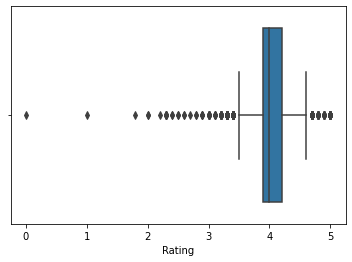

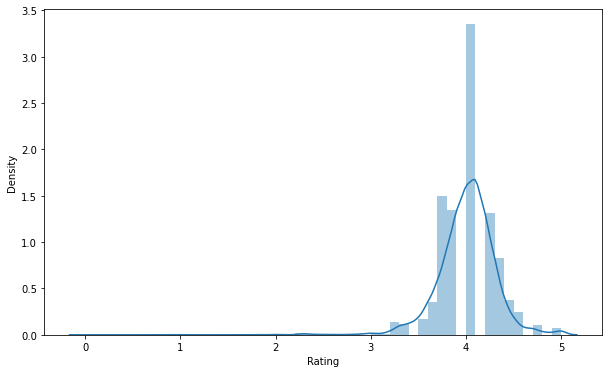

In [132]:
import seaborn as sns
sns.boxplot(test_df.Rating)

fig,ax=plt.subplots(figsize=(10,6))
sns.distplot(test_df.Rating)

In [133]:
r_avg=test_df['Rating'].mean()
r_avg

4.011089069629038

In [134]:
test_df['Rating']=test_df['Rating'].fillna(r_avg)

In [135]:
test_df.isnull().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [136]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5244 non-null   int64  
 1   title       5244 non-null   object 
 2   Rating      5244 non-null   float64
 3   maincateg   5244 non-null   object 
 4   platform    5244 non-null   object 
 5   actprice1   5244 non-null   int64  
 6   norating1   5244 non-null   int64  
 7   noreviews1  5244 non-null   int64  
 8   star_5f     5244 non-null   float64
 9   star_4f     5244 non-null   int64  
 10  star_3f     5244 non-null   int64  
 11  star_2f     5244 non-null   int64  
 12  star_1f     5244 non-null   float64
 13  fulfilled1  5244 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 573.7+ KB


In [137]:
test_df
test_df=pd.get_dummies(test_df,columns=['maincateg','platform'])
test_df.shape

(5244, 16)

In [73]:
test_x=test_df.drop(['id','title'],axis=1)
test_x.shape

(5244, 14)

In [81]:
test_scaled_x=scaler.transform(test_x)

In [82]:
res=lr.predict(test_scaled_x)

In [83]:
df=pd.DataFrame()
df['id']=test_df.id
df['price1']=pd.DataFrame(res)


In [84]:
df

,id,price1
0,2242,445.562726
1,20532,291.563105
2,10648,519.430172
3,20677,1437.022352
4,12593,464.276358
...,...,...
5239,14033,395.281139
5240,297,915.486252
5241,18733,439.567511
5242,6162,212.150010


In [72]:
df.to_csv("predict_result.csv",index=False)

## Neural Network For Regression

In [ ]:
import tensorflow as tf
import pandas as pd

In [83]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [92]:
from tensorflow.keras import models
from tensorflow.keras import layers
nn_model=models.Sequential()
nn_model.add(layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)))
nn_model.add(layers.Dense(64,activation='relu'))
nn_model.add(layers.Dense(64,activation='relu'))
nn_model.add(layers.Dense(1,activation='linear'))
nn_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error','mean_squared_error'])

In [94]:
fitting=nn_model.fit(X_scaled_train,y_train,epochs=100,batch_size=10,validation_data=(X_scaled_test,y_test))

Epoch 1/100
1196/1196 [==============================] - 7s 2ms/step - loss: 178119.6719 - mean_absolute_error: 248.3059 - mean_squared_error: 178119.6719 - val_loss: 83690.8516 - val_mean_absolute_error: 179.0810 - val_mean_squared_error: 83690.8516
Epoch 2/100
1196/1196 [==============================] - 3s 2ms/step - loss: 81776.1328 - mean_absolute_error: 177.8711 - mean_squared_error: 81776.1328 - val_loss: 82192.7969 - val_mean_absolute_error: 180.4083 - val_mean_squared_error: 82192.7969
Epoch 3/100
1196/1196 [==============================] - 2s 2ms/step - loss: 80571.0938 - mean_absolute_error: 176.5827 - mean_squared_error: 80571.0938 - val_loss: 82085.4297 - val_mean_absolute_error: 177.3498 - val_mean_squared_error: 82085.4297
Epoch 4/100
1196/1196 [==============================] - 3s 2ms/step - loss: 79709.7969 - mean_absolute_error: 174.6295 - mean_squared_error: 79709.7969 - val_loss: 81751.8281 - val_mean_absolute_error: 184.4833 - val_mean_squared_error: 81751.8438
Ep

Epoch 34/100
1196/1196 [==============================] - 3s 2ms/step - loss: 72354.6484 - mean_absolute_error: 165.0139 - mean_squared_error: 72354.6484 - val_loss: 73983.2578 - val_mean_absolute_error: 174.4275 - val_mean_squared_error: 73983.2578
Epoch 35/100
1196/1196 [==============================] - 3s 2ms/step - loss: 72259.1484 - mean_absolute_error: 164.4048 - mean_squared_error: 72259.1484 - val_loss: 73464.6953 - val_mean_absolute_error: 164.2936 - val_mean_squared_error: 73464.6953
Epoch 36/100
1196/1196 [==============================] - 3s 2ms/step - loss: 72308.6406 - mean_absolute_error: 164.4122 - mean_squared_error: 72308.6406 - val_loss: 72357.8828 - val_mean_absolute_error: 166.2807 - val_mean_squared_error: 72357.8828
Epoch 37/100
1196/1196 [==============================] - 3s 2ms/step - loss: 71711.3828 - mean_absolute_error: 164.4716 - mean_squared_error: 71711.3828 - val_loss: 73676.0000 - val_mean_absolute_error: 170.9625 - val_mean_squared_error: 73675.9922


Epoch 67/100
1196/1196 [==============================] - 2s 2ms/step - loss: 69766.4688 - mean_absolute_error: 161.4015 - mean_squared_error: 69766.4688 - val_loss: 73896.3125 - val_mean_absolute_error: 169.5245 - val_mean_squared_error: 73896.3125
Epoch 68/100
1196/1196 [==============================] - 3s 2ms/step - loss: 69790.9609 - mean_absolute_error: 161.1591 - mean_squared_error: 69790.9609 - val_loss: 72035.2031 - val_mean_absolute_error: 167.9351 - val_mean_squared_error: 72035.2109
Epoch 69/100
1196/1196 [==============================] - 3s 2ms/step - loss: 69108.3438 - mean_absolute_error: 160.1155 - mean_squared_error: 69108.3438 - val_loss: 72341.6953 - val_mean_absolute_error: 163.9185 - val_mean_squared_error: 72341.6953
Epoch 70/100
1196/1196 [==============================] - 3s 2ms/step - loss: 69254.1719 - mean_absolute_error: 160.5968 - mean_squared_error: 69254.1719 - val_loss: 71191.5781 - val_mean_absolute_error: 162.7887 - val_mean_squared_error: 71191.5781


Epoch 100/100
1196/1196 [==============================] - 3s 2ms/step - loss: 66963.4922 - mean_absolute_error: 157.8085 - mean_squared_error: 66963.4922 - val_loss: 71288.0547 - val_mean_absolute_error: 162.5123 - val_mean_squared_error: 71288.0547


In [144]:
test_predictions=nn_model.predict(X_scaled_test)
nn_model.evaluate(X_scaled_test,y_test)

NameError: name 'nn_model' is not defined

In [100]:
rmse=np.sqrt(nn_model.evaluate(X_scaled_test,y_test)[2])
rmse

94/94 [==============================] - 0s 2ms/step - loss: 71288.0547 - mean_absolute_error: 162.5123 - mean_squared_error: 71288.0547


266.99822974600414

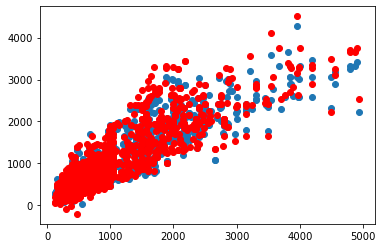

In [119]:
plt.scatter(y_test,test_predictions)
plt.scatter(y_test,y_predicted,c='r')

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rf_reg=RandomForestRegressor(n_estimators=100,random_state=0)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [116]:
    y_actual = y_test
    y_predicted = rf_reg.predict(X_test)
 
    #MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
    MSE= metrics.mean_squared_error(y_test,y_predicted)
    RMSE = np.sqrt(MSE)
    print("Root Mean absolute Error: ",metrics.mean_absolute_error(y_test,y_predicted))
    print("Mean Square Error: ",MSE)
    print("Root Mean Square Error: ",RMSE)

Root Mean absolute Error:  95.00969926119124
Mean Square Error:  40563.63367351329
Root Mean Square Error:  201.40415505523538


In [138]:
test_scaled_x=scaler.transform(test_x)

In [139]:
res1=rf_reg.predict(test_x)

In [140]:
df1=pd.DataFrame()
df1['id']=test_df.id
df1['price1']=pd.DataFrame(res1)

In [143]:
df1.to_csv("predict_result_2.csv",index=False)

In [142]:
df1.shape

(5244, 2)